**Importing the dependencies**

In [54]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

**Loading the data**

In [55]:
data=pd.read_csv("/content/seattle-weather.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [56]:
#number of rows and columns
data.shape

(1461, 6)

In [57]:
#checking for missing values
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [58]:
#statistical analysis
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


**Visualizing our data**

<Axes: xlabel='weather', ylabel='count'>

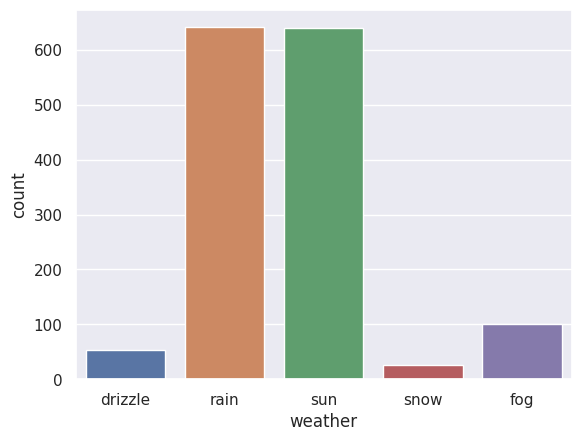

In [59]:
#countplot
sns.countplot(x='weather',data=data)

<Axes: xlabel='temp_max'>

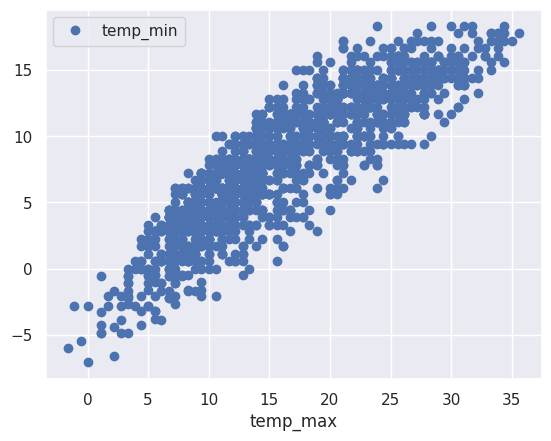

In [60]:
#scatterplot
data.plot("temp_max","temp_min",style='o') 

<Axes: xlabel='precipitation', ylabel='Count'>

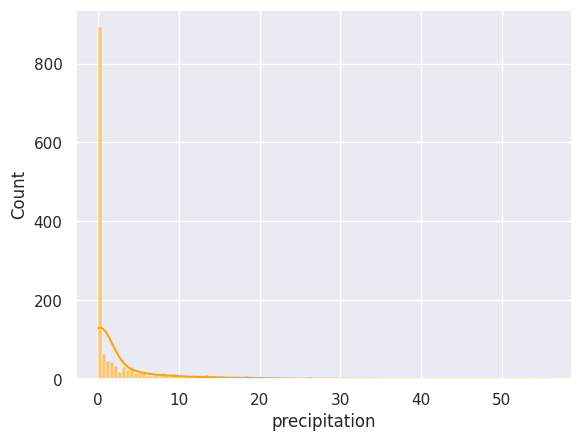

In [61]:
#histogram
sns.set(style="darkgrid")
sns.histplot(data=data,x="precipitation",kde=True,color='orange')

<Axes: xlabel='temp_max', ylabel='Count'>

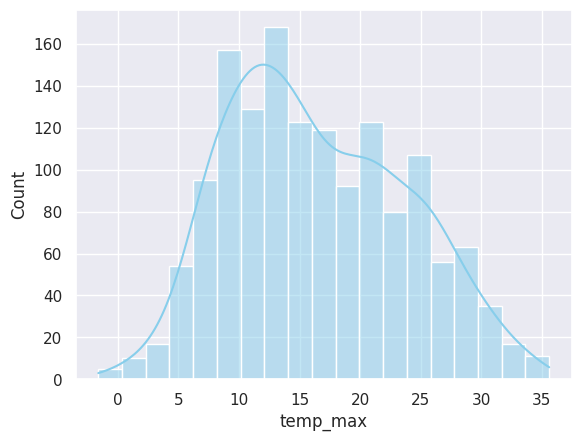

In [62]:
sns.set(style="darkgrid")
sns.histplot(data=data,x="temp_max",kde=True,color='skyblue')

<Axes: xlabel='temp_min', ylabel='Count'>

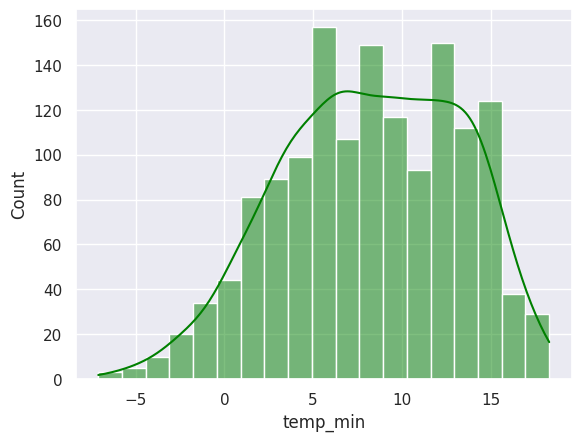

In [63]:
sns.set(style="darkgrid")
sns.histplot(data=data,x="temp_min",kde=True,color='green')

<Axes: xlabel='wind', ylabel='Count'>

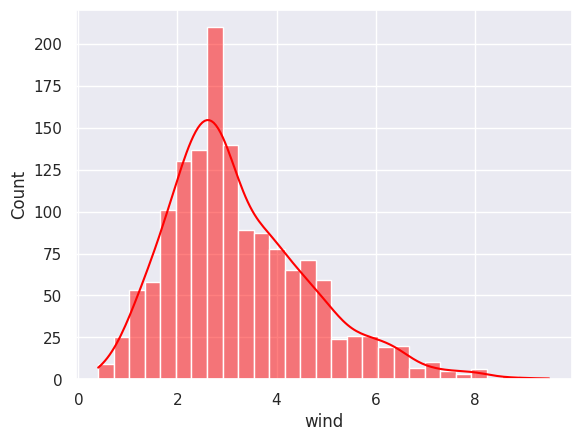

In [64]:
sns.set(style="darkgrid")
sns.histplot(data=data,x="wind",kde=True,color='red')

**Comparing with subplots**

<Axes: xlabel='wind', ylabel='Count'>

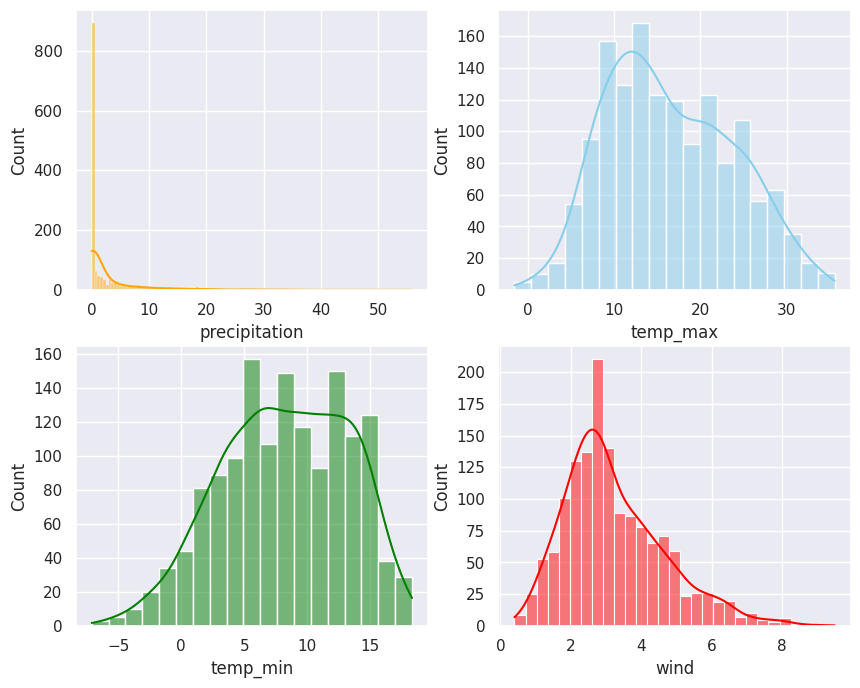

In [65]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x="precipitation",kde=True,color='orange',ax=axs[0,0])
sns.histplot(data=data,x="temp_max",kde=True,color='skyblue',ax=axs[0,1])
sns.histplot(data=data,x="temp_min",kde=True,color='green',ax=axs[1,0])
sns.histplot(data=data,x="wind",kde=True,color='red',ax=axs[1,1])


In [66]:
#getting overall percentage
countrain=len(data[data.weather=="rain"])
countsun=len(data[data.weather=="sun"])
countdrizzle=len(data[data.weather=="drizzle"])
countsnow=len(data[data.weather=="snow"])
countfog=len(data[data.weather=="fog"])
print("Percent of Rain:{:2f}%".format((countrain/(len(data.weather))*100)))
print("Percent of Sun:{:2f}%".format((countsun/(len(data.weather))*100)))
print("Percent of Drizzle:{:2f}%".format((countdrizzle/(len(data.weather))*100)))
print("Percent of Snow:{:2f}%".format((countsnow/(len(data.weather))*100)))
print("Percent of Fog:{:2f}%".format((countfog/(len(data.weather))*100)))

Percent of Rain:43.874059%
Percent of Sun:43.805613%
Percent of Drizzle:3.627652%
Percent of Snow:1.779603%
Percent of Fog:6.913073%


Violin plots include a box plot component, which provides information about the quartiles, median, and potential outliers in the data. This allows you to identify any extreme values or data points that deviate significantly from the overall distribution.

<Axes: xlabel='wind'>

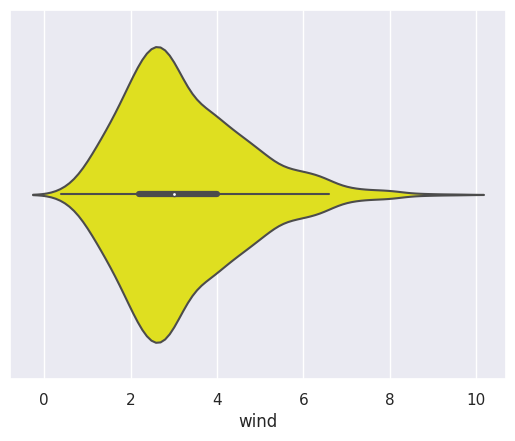

In [67]:
#violin plots
sns.set(style="darkgrid")
sns.violinplot(data=data,x="wind",kde=True,color='yellow')

<Axes: xlabel='temp_min'>

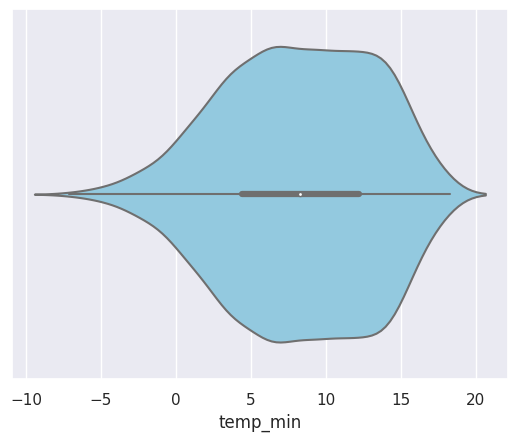

In [68]:
sns.set(style="darkgrid")
sns.violinplot(data=data,x="temp_min",kde=True,color='skyblue')

<Axes: xlabel='temp_max'>

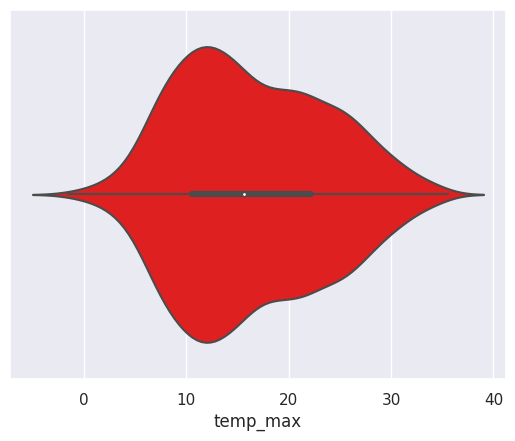

In [69]:
sns.set(style="darkgrid")
sns.violinplot(data=data,x="temp_max",kde=True,color='red')

<Axes: xlabel='precipitation'>

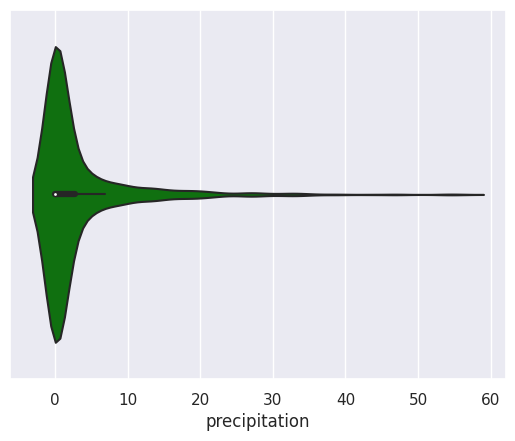

In [70]:
sns.set(style="darkgrid")
sns.violinplot(data=data,x="precipitation",kde=True,color='green')

Boxplot

<Axes: xlabel='temp_max', ylabel='weather'>

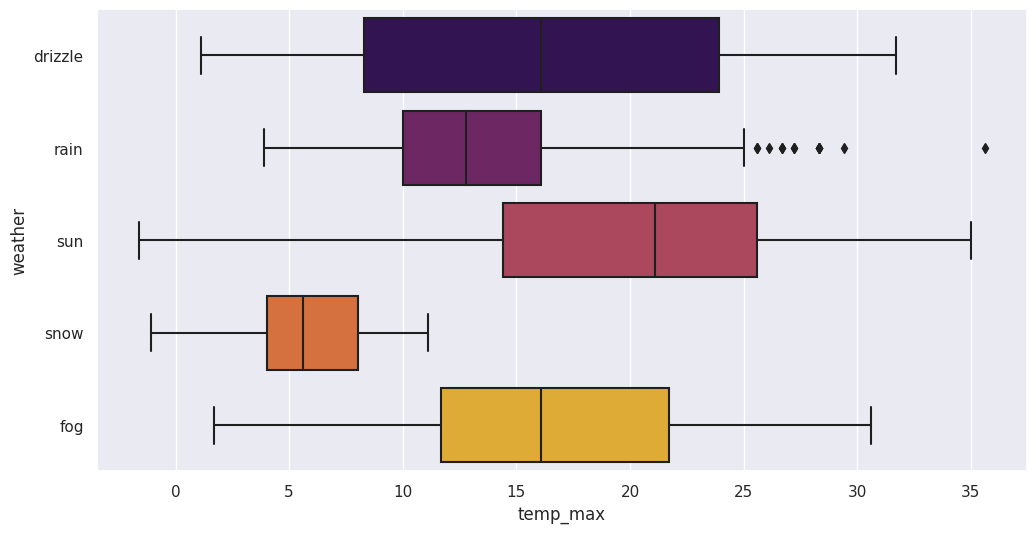

In [71]:
plt.figure(figsize=(12,6))
sns.boxplot(x="temp_max",y="weather",data=data,palette="inferno")

<Axes: xlabel='temp_min', ylabel='weather'>

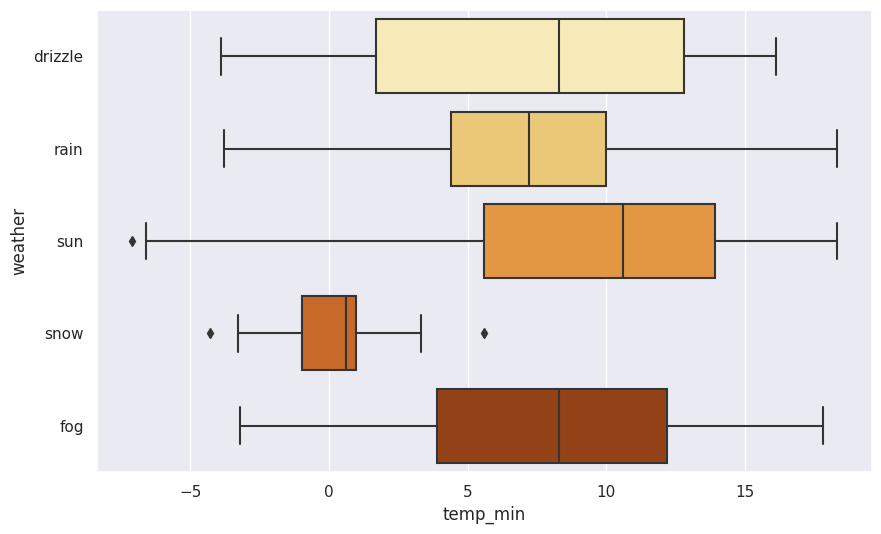

In [72]:
plt.figure(figsize=(10,6))
sns.boxplot(x="temp_min",y="weather",data=data,palette="YlOrBr")

Heat map

<ipython-input-73-66d7a4e94c8f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='coolwarm')


<Axes: >

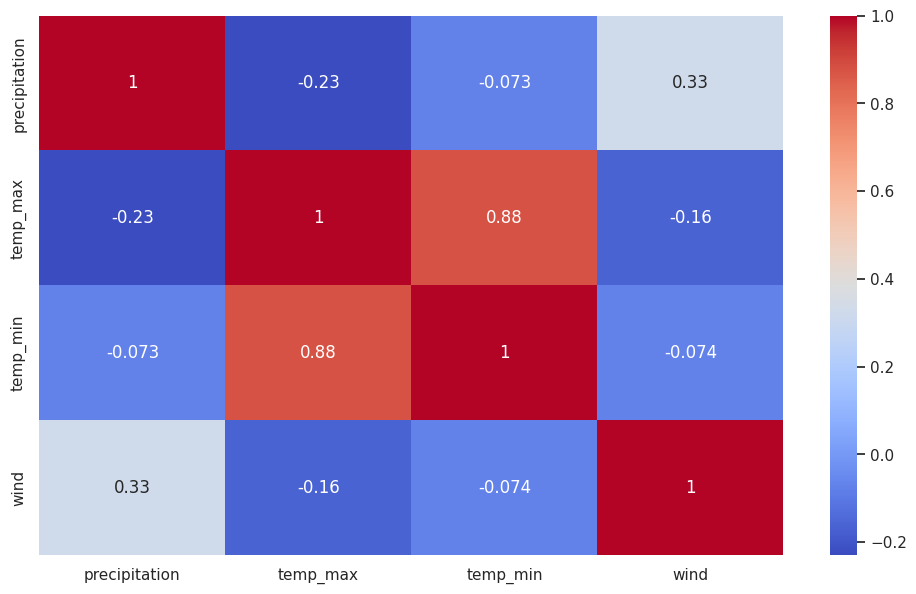

In [73]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [74]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [75]:
#Drop Unnecessary Variables
#In this data set Date is a unnecessary variable as it does not affect the data so it can be dropped.
df=data.drop(["date"],axis=1)

In [76]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [77]:
#***Scaling the weather variables using label Encoder:***
lc=LabelEncoder()
df["weather"]=lc.fit_transform(df["weather"])

In [78]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2


**Splitting the dependent and independent variables**


In [79]:
x=((df.loc[:,df.columns!="weather"]).astype(int)).values[:,0:]
y=df["weather"].values

**Splitting the dataset into training data  and testing data**

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

**Loading the data into the machine learning algorithm and getting the performance of the algorithm**

In [81]:
#k-NearestNeighbors
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(x_test,y_test)*100))

KNN Accuracy:76.87%


In [82]:
#Support vector machine
svm=SVC()
svm.fit(x_train,y_train)
print("SVM Accuracy:{:.2f}%".format(svm.score(x_test,y_test)*100))

SVM Accuracy:77.55%


**Testing our model with new unseen data**

In [83]:
input=[[1.140175,8.9,2.8,2.469818]]
ot=svm.predict(input)
print("The weather is:")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("snow")
else:
    print("Sun")

The weather is:
Rain
